___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Проверочный проект по моделям машинного обучения с учителем (supervised learning) - Методы на основе деревьев



## Этот проверочный проект можно выполнять тремя разными способами - мы обсуждаем это в видео-лекции с обзором проверочных заданий!

----

**Проверочный проект можно выполнять одним из трёх способов:**
   1. Открыть новый блокнот Jupyter Notebook, загрузить данные из файла - и далее самостоятельно выполнить анализ и визуализацию данных, а также создать предиктивную модель.
   2. Использовать блокнот с заданиями как общее руководство к действию, выполняя задания, написанные жирным шрифтом.
   3. Сразу перейти к блокноту с решениями и видео-лекциям с решениями, и параллельно с просмотром лекций выполнять эти задания в своём блокноте.

------
------

## ЦЕЛЬ: Создать модель предсказания того, уйдёт ли абонент в отток (churn).

----
----


## Выполните задания ниже, обозначенные жирным шрифтом!

## Часть 0: Импортируем библиотеки и загружаем данные

**Задание: Запустите уже готовые ячейки ниже, чтобы импортировать библиотеки и загрузить данные из файла в датафрейм. Файл называется "Telco-Customer-Churn.csv"**

In [2]:
# Запустите эти ячейки для начала выполнения проекта!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Часть 1: Общие характеристики данных

**Задание: С помощью метода .info() проверьте типы данных для колонок, а также есть ли отсутствующие значения в Вашем датафрейме.**

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**Задание: Выведите статистические метрики для числовых колонок с помощью .describe(). Вы увидите, что большинство колонок являются категориальными, поэтому Вам позднее нужно будет создать для них дамми-переменные.**

In [6]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Часть 2:  Исследование данных (Exploratory Data Analysis)

## Исследование признаков

**Задание: Проверьте, что в этих данных нет отсутствующих значений - для этого выведите количество значений NaN отдельно для каждой колонки.**

In [7]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Задание: Постройте график CountPlot для проверки сбалансированности значений колонки с классами (Churn).**

<Axes: xlabel='Churn', ylabel='count'>

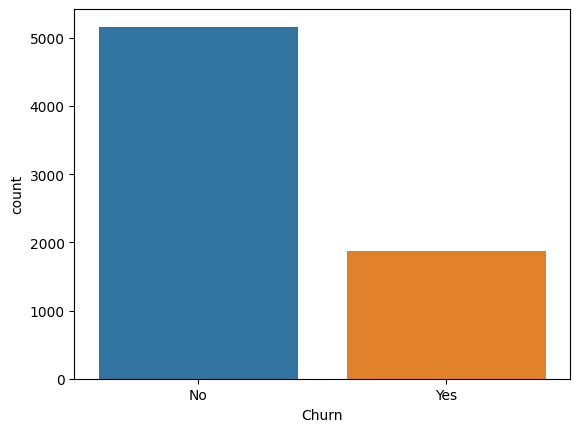

In [8]:
sns.countplot(df,x='Churn')


**Задание: Исследуйте распределение колонки TotalCharges по различным категориям Churn с помощью графика Box Plot или Violin Plot.**

<Axes: xlabel='Churn', ylabel='TotalCharges'>

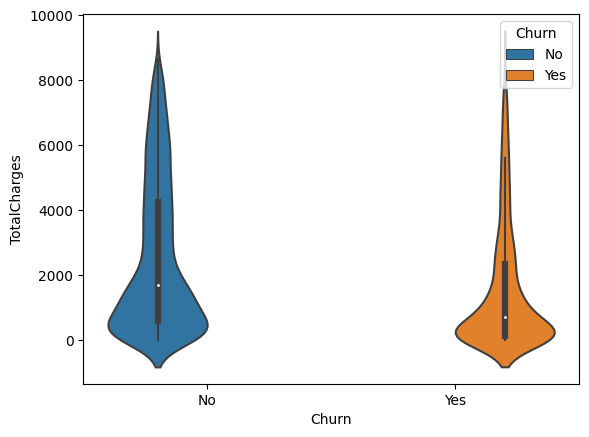

In [9]:
sns.violinplot(df,x='Churn',y='TotalCharges',hue='Churn')


**Задание: Постройте график boxplot с распределением колонки TotalCharges для различных типов контрактов, а также добавьте раскраску цветами по колонке Churn.**

<Axes: xlabel='Contract', ylabel='TotalCharges'>

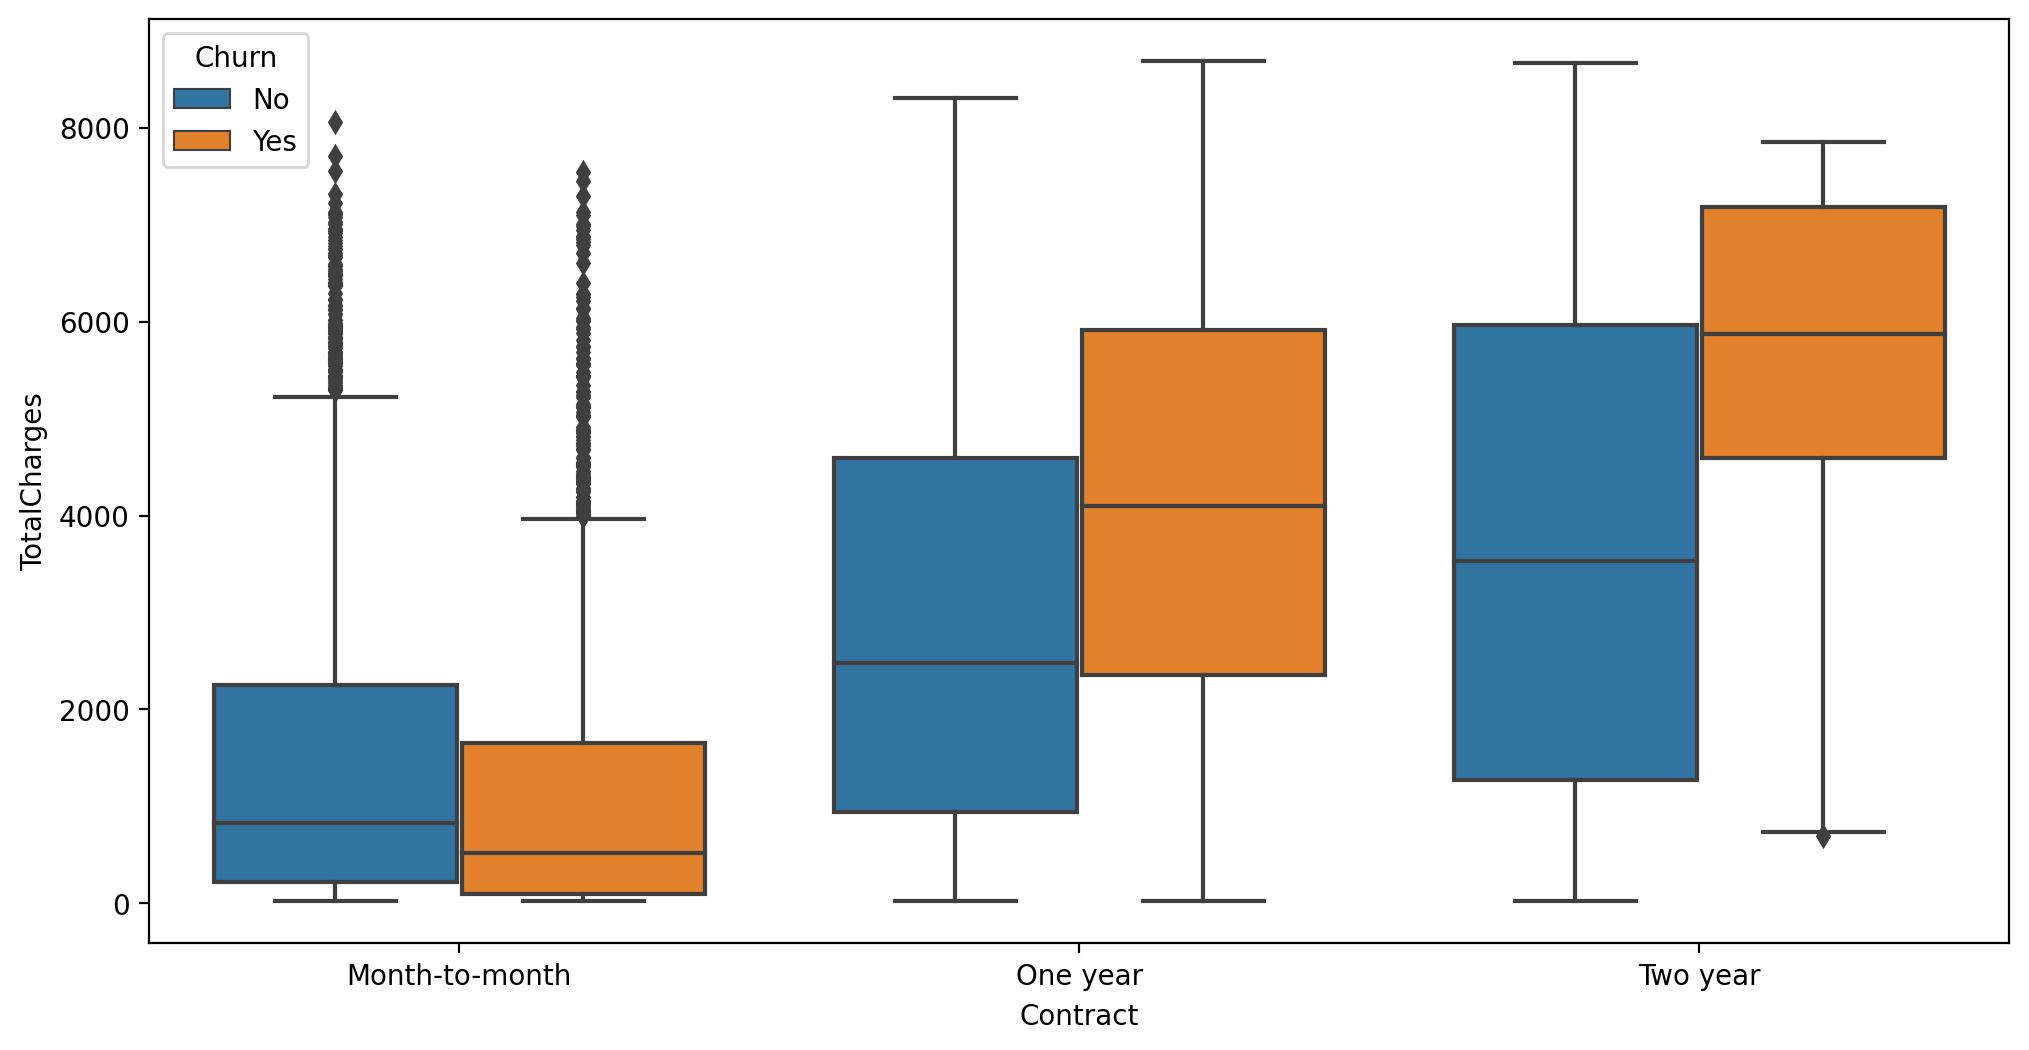

In [10]:
plt.figure(figsize=(12,6),dpi=200)
sns.boxplot(df,x='Contract',y='TotalCharges',hue='Churn')


**Задание: Постройте график barplot с корреляции указанных ниже признаков с целевой переменной. Обратите внимание, что для категориальных признаков сначала нужно сконвертировать их в дамми-переменные, потому что корреляция вычисляется только для числовых колонок.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Мы специально привели список признаков, чтобы не проверять все признаки. Дело в том, что некоторые признаки имеют слишком много уникальных значений для такого анализа, например колонка customerID.***

In [11]:
corr_df=pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']],drop_first=True).corr()


In [12]:
corr_yes_churn=corr_df['Churn_Yes'].sort_values().iloc[:-1]

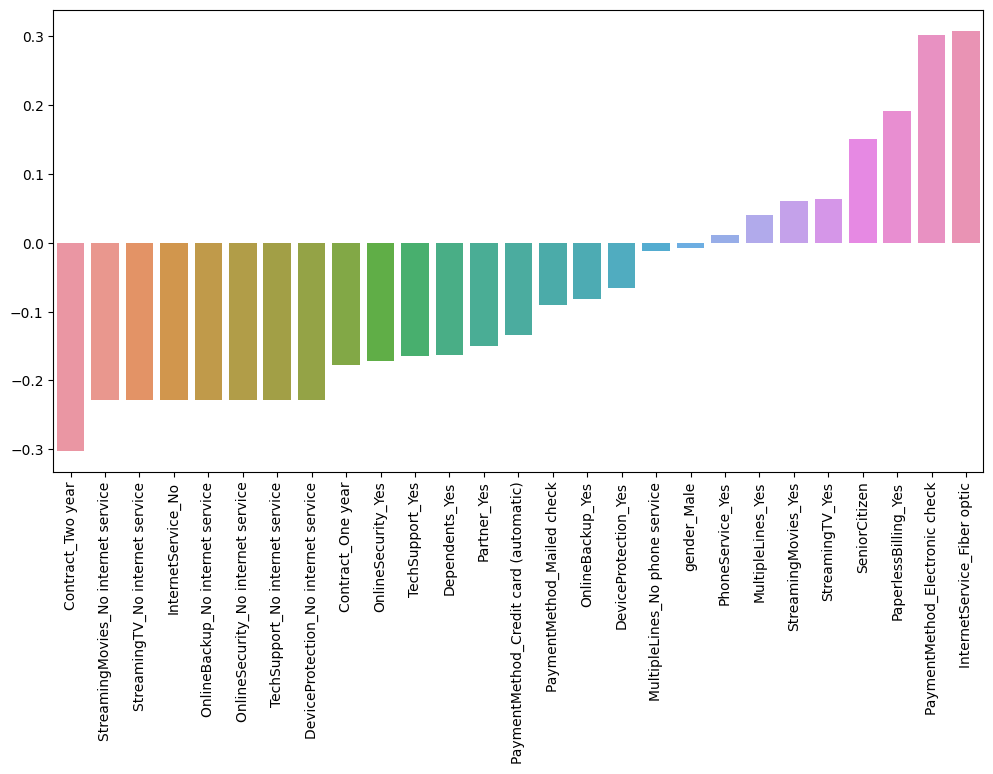

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(x=corr_yes_churn.index,y=corr_yes_churn.values)
plt.xticks(rotation=90);

---
---

# Часть 3: Анализ оттока

**В этих заданиях мы выполним сегментацию абонентов на основе колонки tenure, создавая "когорты" и выполняя сравнение данных между различными когортами.**

**Задание: Перечислите 3 типа контракта (колонка Contract).**

In [14]:
df['Contract'].unique()


array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**Задание: Создайте гистограмму с распределением значений колонки tenure - это количество месяцев, сколько времени человек является (или являлся) абонентом компании.**

<Axes: xlabel='tenure', ylabel='Count'>

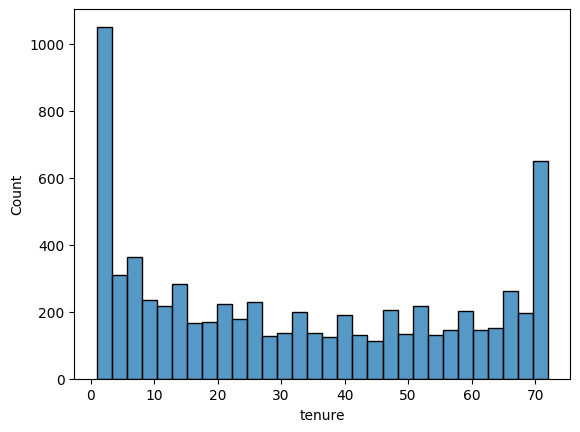

In [15]:
sns.histplot(df,x='tenure',bins=30)


**Задание: Постройте гистограммы для колонки tenure, разбивая данные по двум колонкам - Churn и Contract. Посмотрите документацию по seaborn или блокноты для раздела про seaborn, чтобы вспомнить, как это делается.**

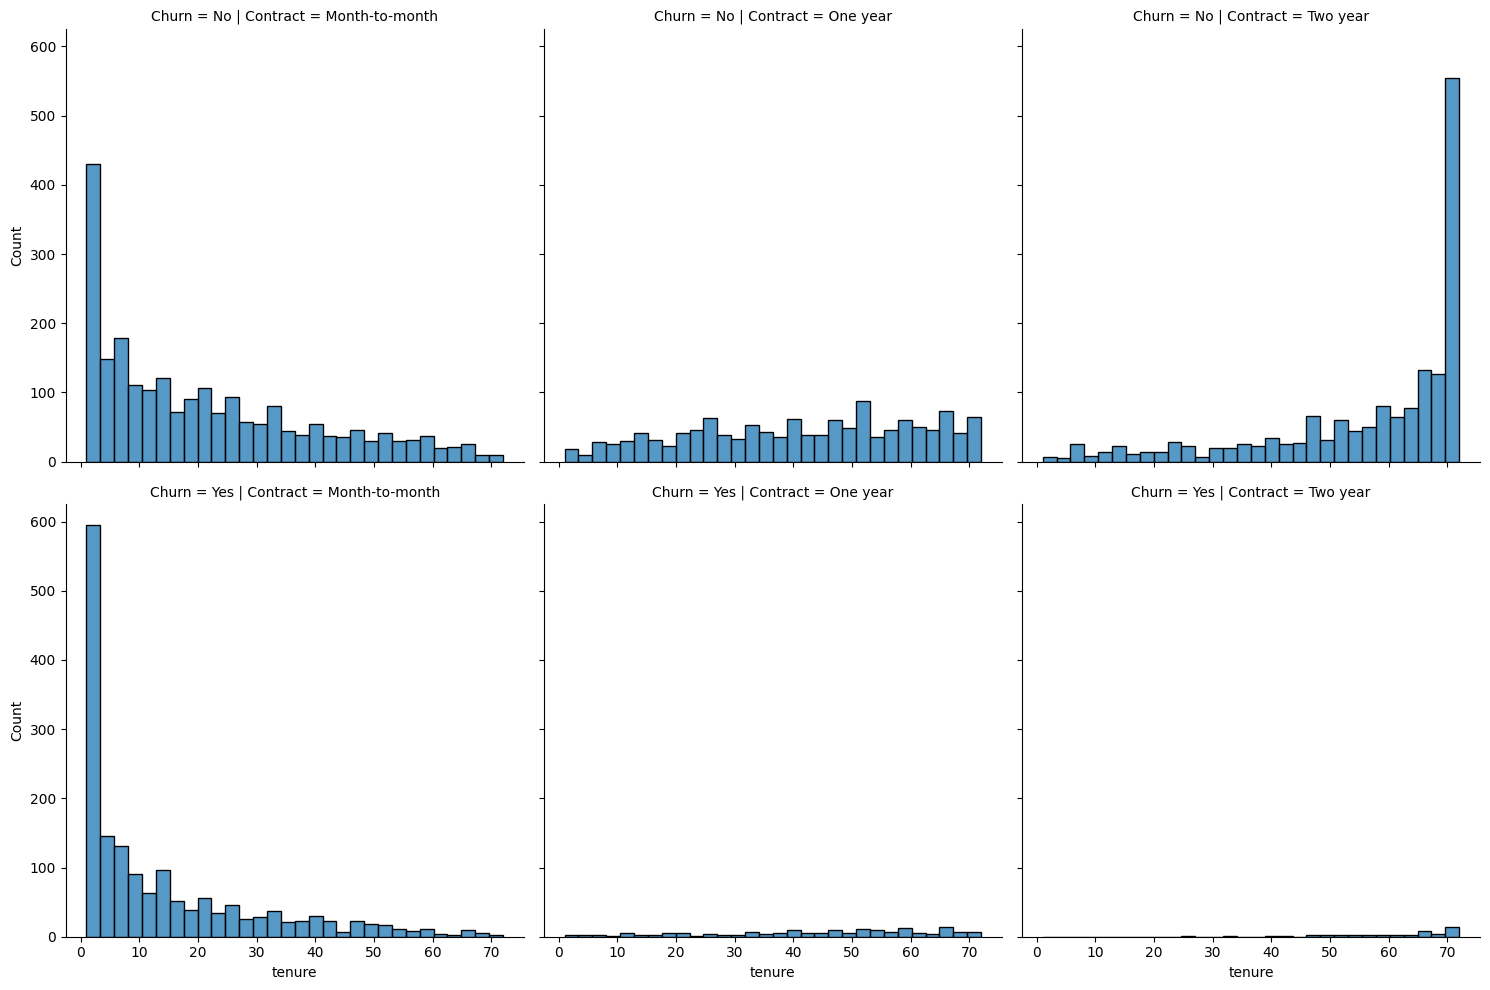

In [16]:
sns.displot(df,x='tenure',col='Contract',row='Churn',bins=30)


**Задание: Постройте график scatterplot для колонок Total Charges и Monthly Charges, раскрашивая график цветами по колонке Churn.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

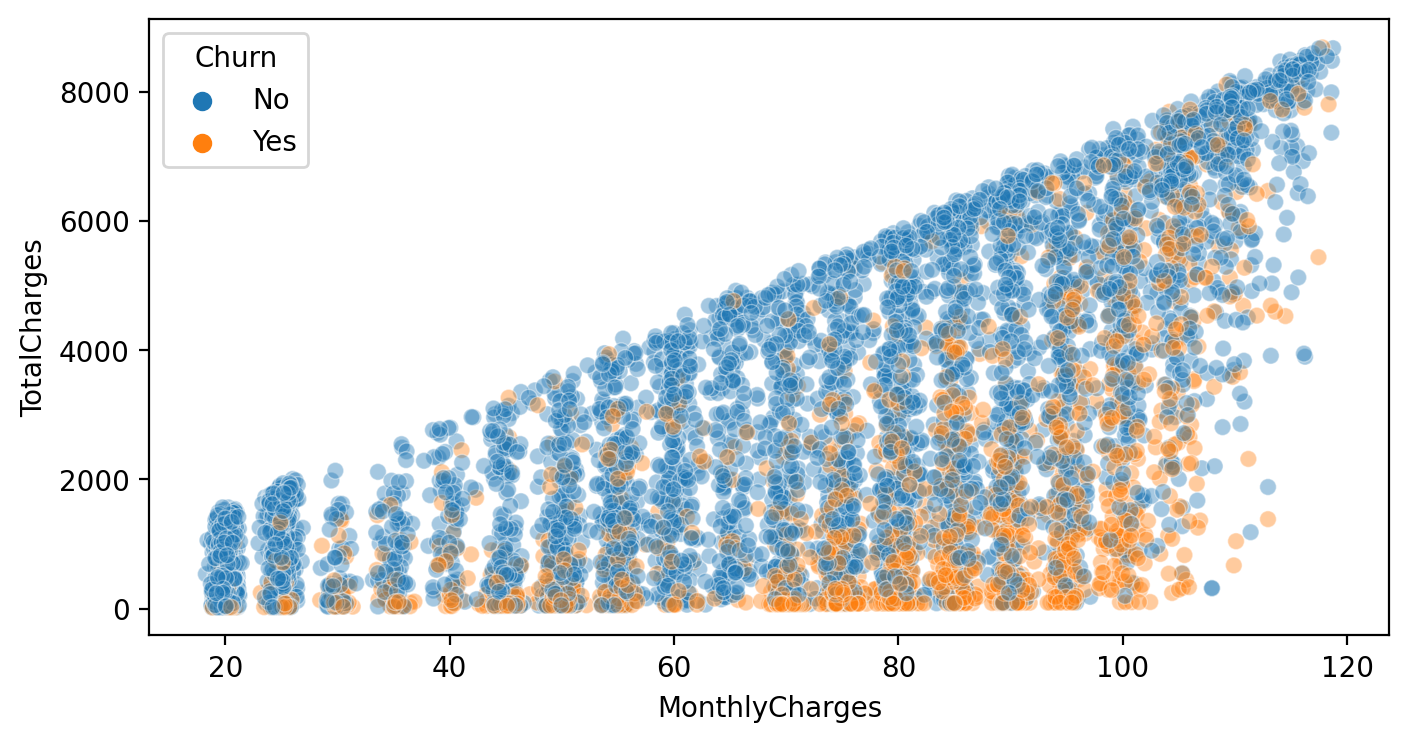

In [17]:
plt.figure(figsize=(8,4),dpi=200)
sns.scatterplot(df,x='MonthlyCharges',y='TotalCharges',hue='Churn',alpha=0.4)


### Создание когорт (сегментов) по колонке Tenure

**Для начала поместим различные значения tenure (1 месяц, 2 месяца, 3 месяца и так далее) в отдельные когорты (сегменты).**

**Задание: Для каждого уникального значения колонки tenure в качестве когорты, вычислите процент оттока (churn rate) - это количество тех людей, кто ушёл в отток в когорте, как процент от общего количества людей в данной когорте. Вычислите такой процент отдельно для каждой когорты. Например, для когорты с tenure = "1 месяц" должен получиться процент оттока 61.99%. В итоге у Вас должны получиться когорты от 1 до 72 месяцев, и с увеличением количества месяцев уровень оттока должен снижаться. Это разумно, потому что чем дольше человек пользуется услугами компании, тем вероятнее то, что его/её всё устраивает, и он/она продолжит пользоваться этими услугами.**

In [18]:
yes_churn=df.groupby(['Churn','tenure']).count().transpose()['Yes']
no_churn=df.groupby(['Churn','tenure']).count().transpose()['No']


In [19]:
churn_rate=100*yes_churn/(no_churn+yes_churn)

In [20]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

**Задание: Используя результаты предыдущего задания, постройте график процента оттока для различных значений tenure.**

<Axes: xlabel='tenure'>

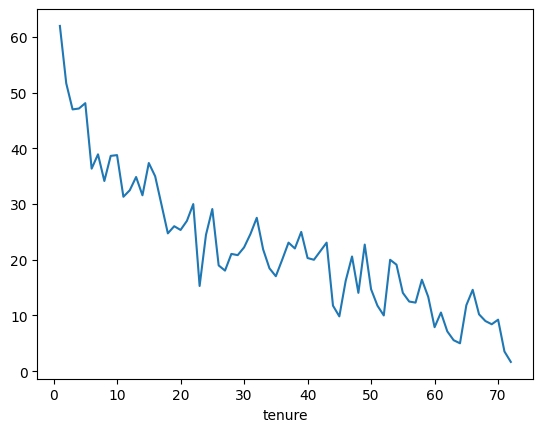

In [21]:
churn_rate.transpose()['customerID'].plot()

### Более крупные когорты (сегменты)
**Задание: На основе колонки tenure создайте новую колонку с названием "Tenure Cohort", в которой будут следующие 4 категории:**
   * '0-12 месяцев'
   * '24-48 месяцев'
   * '12-24 месяцев'
   * 'Более 48 месяцев'    

In [22]:
# Напишите Ваш код в этой ячейке
def tenure_cohort(tenure):
    if tenure<13:
        return '0-12 moths'
    elif tenure <25:
        return '12-24 moths'
    elif tenure <49:
        return '24-48 moths'
    else:
        return '>48 moths'

In [23]:
df['tenure_cohort']=df['tenure'].apply(tenure_cohort)

In [24]:
df[['tenure_cohort','tenure']]

,tenure_cohort,tenure
0,0-12 moths,1
1,24-48 moths,34
2,0-12 moths,2
3,24-48 moths,45
4,0-12 moths,2
...,...,...
7027,12-24 moths,24
7028,>48 moths,72
7029,0-12 moths,11
7030,0-12 moths,4


**Задание: Постройте график scatterplot для Total Charges и Monthly Charts, раскрашивая график разными цветами по колонке "Tenure Cohort", которую Вы создали в предыдущем задании.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

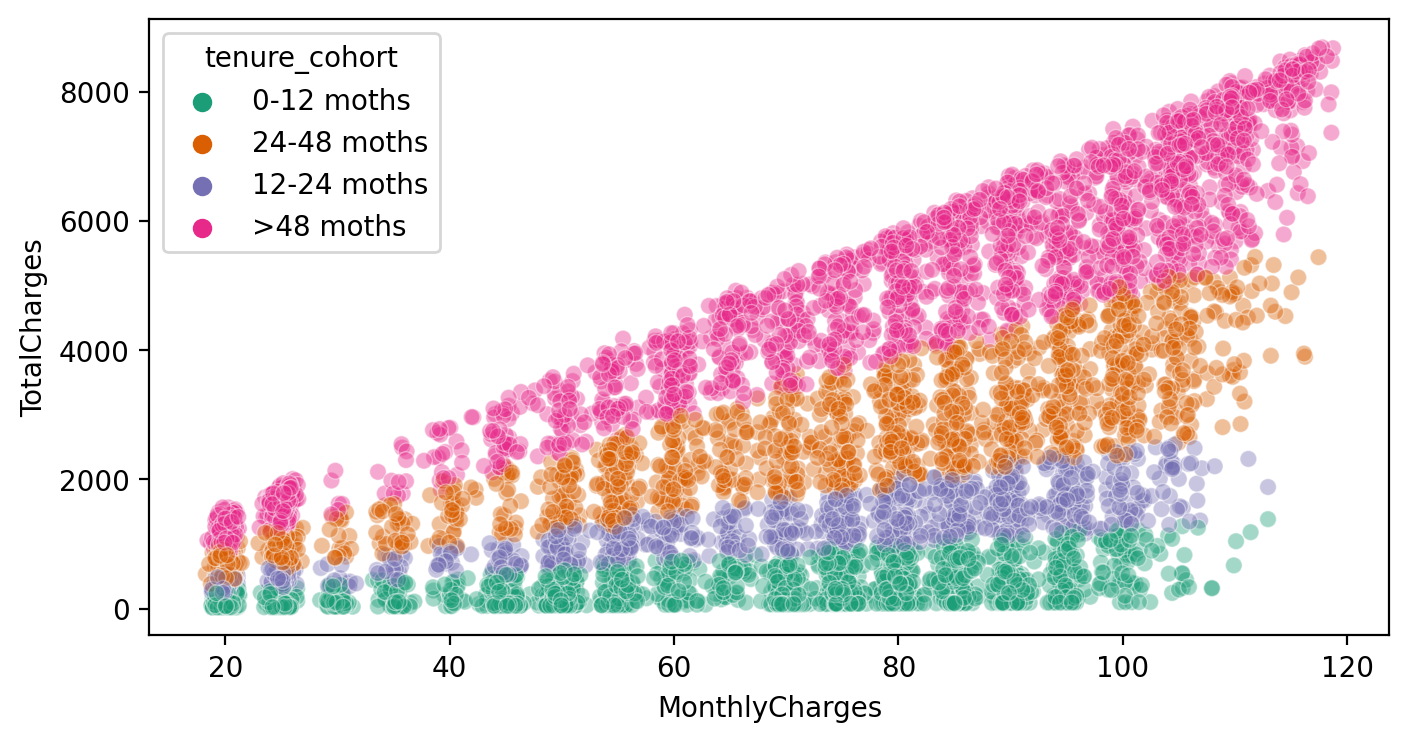

In [25]:
plt.figure(figsize=(8,4),dpi=200)
sns.scatterplot(df,x='MonthlyCharges',y='TotalCharges',hue='tenure_cohort',alpha=0.4,palette='Dark2')


**Задание: Постройте график countplot с количеством ушедших и не ушедших в отток людей в каждой когорте.**

<Axes: xlabel='tenure_cohort', ylabel='count'>

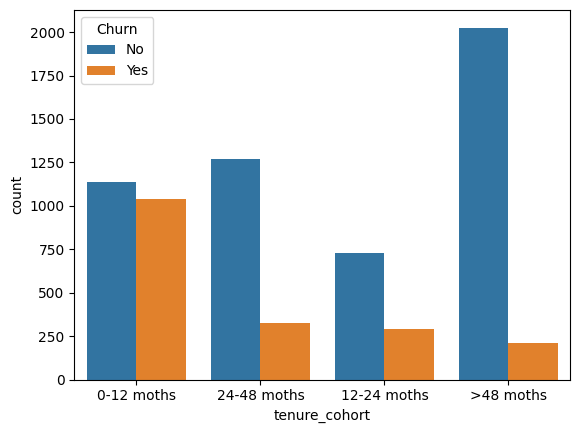

In [26]:
sns.countplot(df,x='tenure_cohort',hue='Churn')


**Задание: Создайте набор графиков CountPlot с количеством людей по различным когортам Tenure Cohort. Для каждого типа контракта создайте отдельный график, и раскрасьте эти графики разными цветами по колонке Churn.**

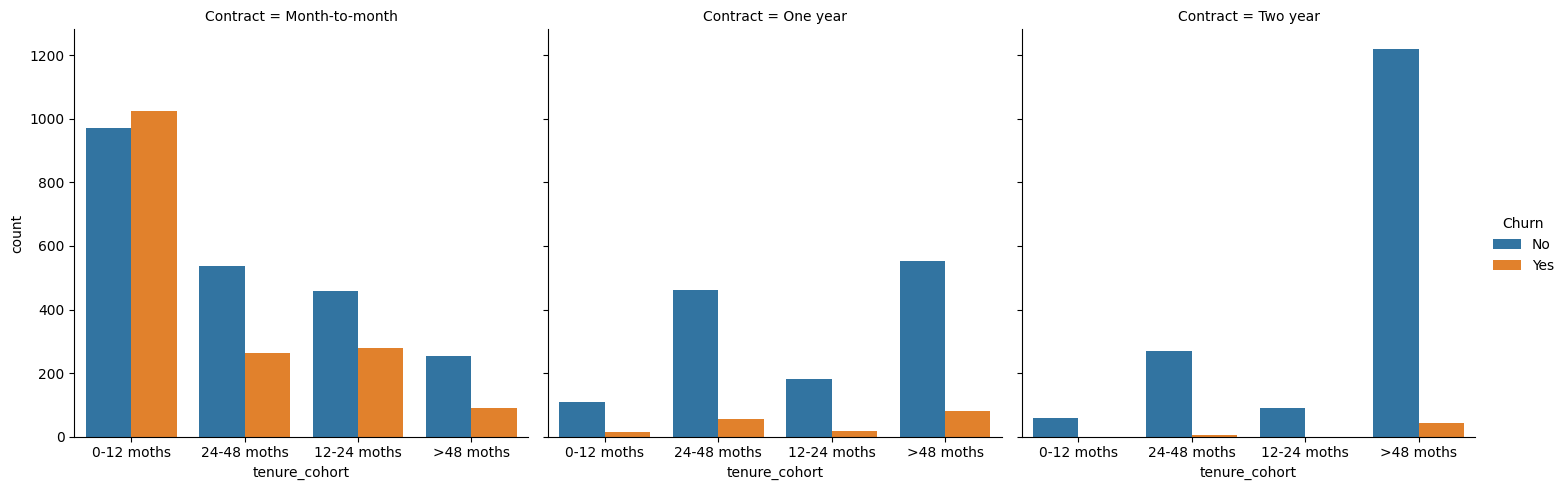

In [27]:
sns.catplot(df,x='tenure_cohort',hue='Churn',kind='count',col='Contract')

-----

# Часть 4: Предиктивная модель

**Давайте исследуем 4 модели на основе деревьев: одно дерево решений, случайный лес, адаптивный бустинг и градиентный бустинг. При желании Вы можете дополнительно попробовать любые другие модели машинного обучения с учителем (supervised learning models) и сравнить результаты!**


## Одно дерево решений (Decision Tree)

**Задание: Разделите все данные на признаки X и целевую переменную Y. Создайте дамми-переменные, где это необходимо, а также посмотрите, есть ли какие-то признаки, которые можно было бы удалить.**

In [28]:
X=df.drop(['customerID','Churn'],axis=1)

In [29]:
X=pd.get_dummies(X,drop_first=True)

In [30]:
y=df['Churn']

**Задание: Выполните разбиение данных на обучающий и тестовый наборы (train test split), откладывая в сторону 10% данных для тестирования. В решениях мы используем random_state=101.**

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)


In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {'max_depth':[3,4,5,6]}
DT=DecisionTreeClassifier()
GS=GridSearchCV(DT,param_grid=param_grid)

In [39]:
GS.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6]})

In [40]:
GS.best_params_

{'max_depth': 5}

### По всей видимости, нужно использовать дерево с макс глубиной 5

In [55]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

In [46]:
DT_good=DecisionTreeClassifier(max_depth=5)
DT_good.fit(X_train,y_train)
dt_pred=DT_good.predict(X_test)


**Задание: Постройте модель Decision Tree и оцените её работу. Для этого выполните следующие шаги:**
   1. Обучите модель дерева решений (при желании можете выполнить поиск по сетке для поиска оптимальных значений гиперпараметров).
   2. Оцените метрики работы модели дерева решений - для этого выведите отчёт "classification report" и нарисуйте график с матрицей ошибок (confusion matrix).
   2. Посмотрите на важности признаков для получившегося дерева решений.
   4. Опционально: Нарисуйте график получившегося дерева. Обратите внимание, что если дерево получилось очень большим и Вы не выполняли усечение дерева с помощью параметров, то вызов метода plot_tree может привести к ошибке.

In [47]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

          No       0.86      0.89      0.87       557
         Yes       0.52      0.44      0.47       147

    accuracy                           0.80       704
   macro avg       0.69      0.66      0.67       704
weighted avg       0.79      0.80      0.79       704



In [59]:
cm=confusion_matrix(y_test,dt_pred)

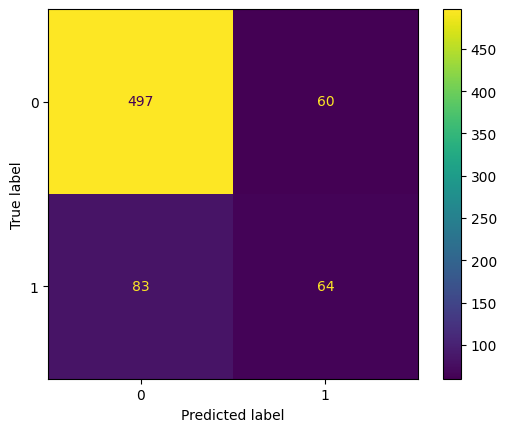

In [60]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm) 
disp.plot()
plt.show()

In [63]:
imp_feat=pd.DataFrame(data=DT_good.feature_importances_,index=X.columns,columns=['Importance'])
imp_feat=imp_feat[imp_feat['Importance']>0.0001].sort_values('Importance')

In [64]:
imp_feat

,Importance
OnlineSecurity_Yes,0.005676
OnlineBackup_Yes,0.005786
PhoneService_Yes,0.007542
MultipleLines_Yes,0.007999
SeniorCitizen,0.008175
TechSupport_Yes,0.008523
Contract_One year,0.009622
Contract_Two year,0.023321
MonthlyCharges,0.024671
StreamingMovies_No internet service,0.028480


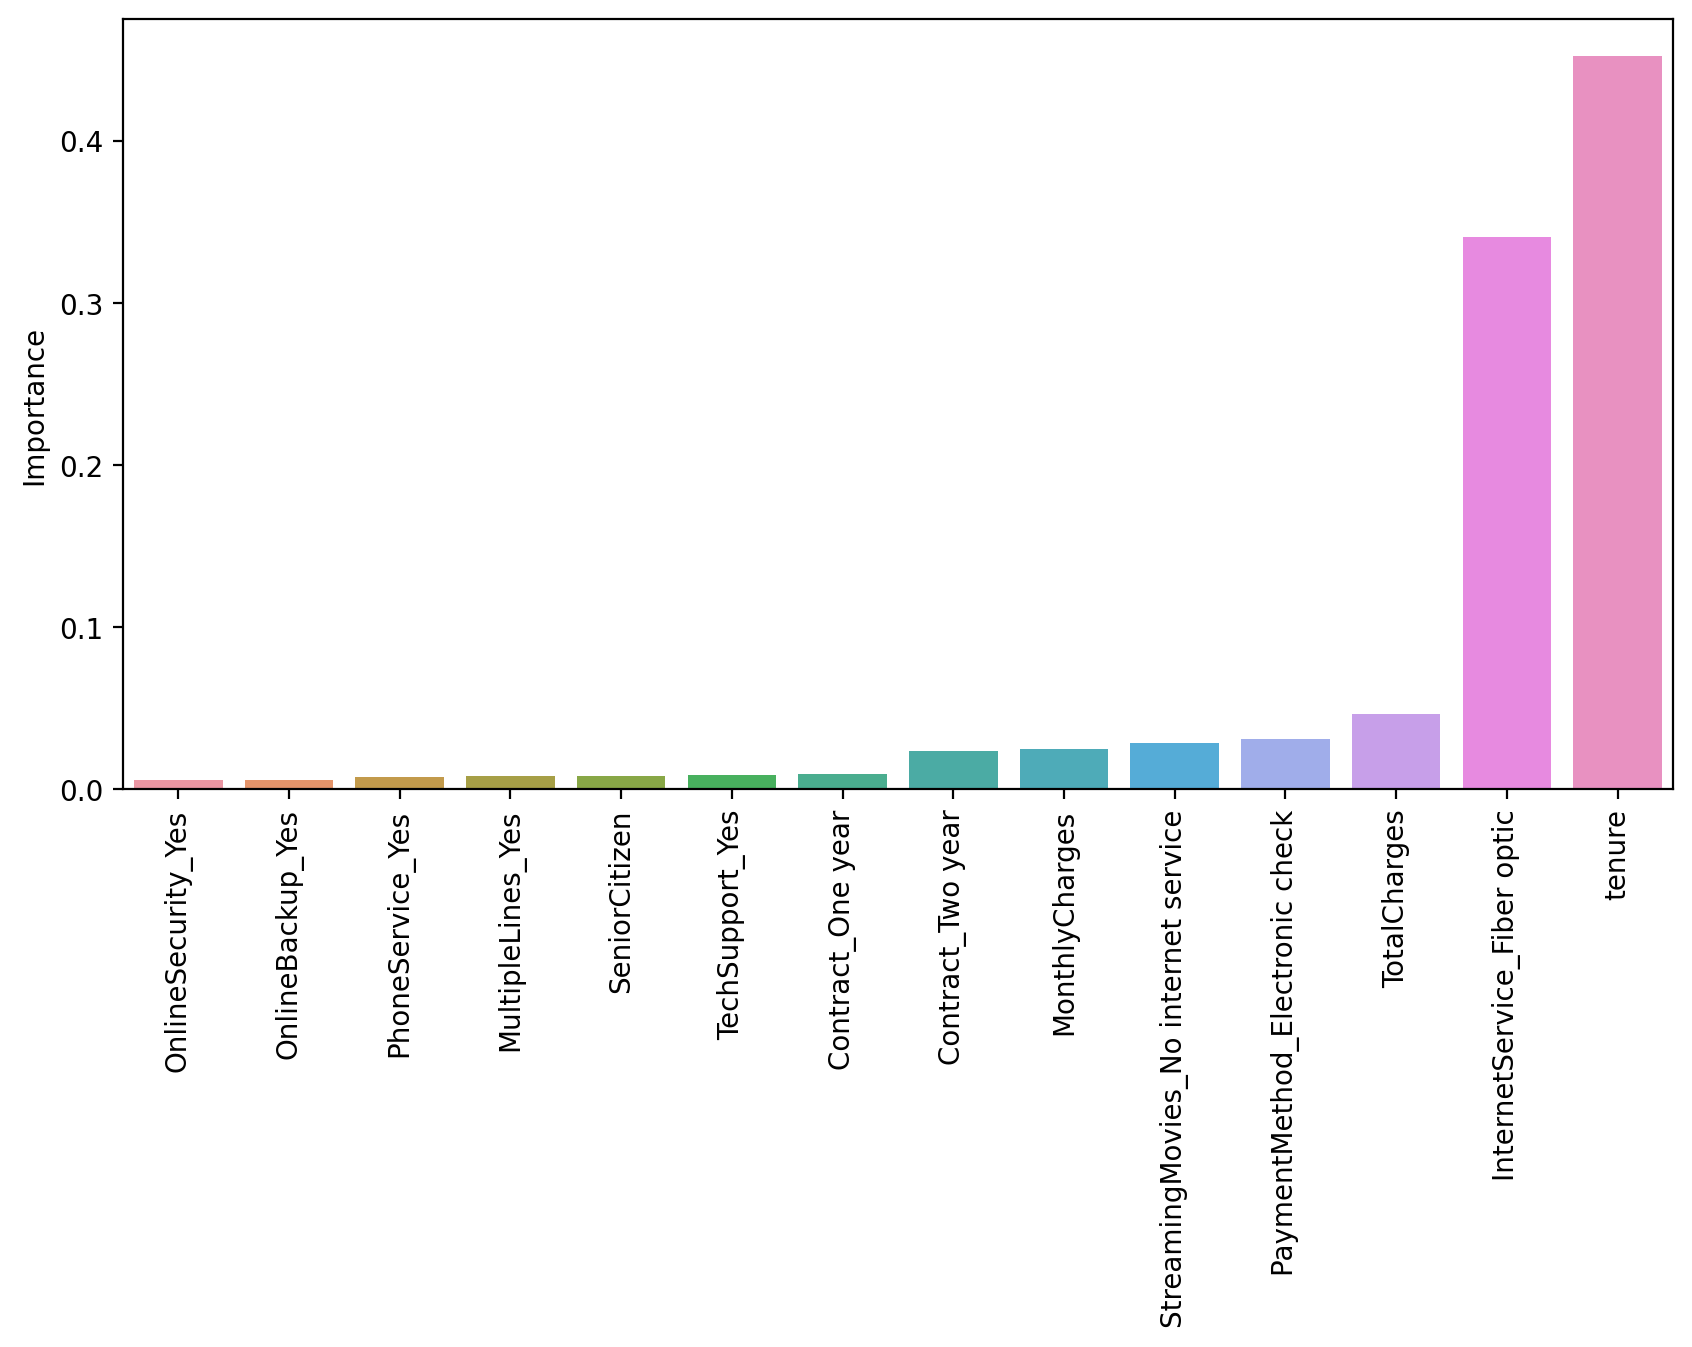

In [67]:
plt.figure(figsize=(10,5),dpi=200)
sns.barplot(data=imp_feat,x=imp_feat.index,y='Importance')
plt.xticks(rotation=90);

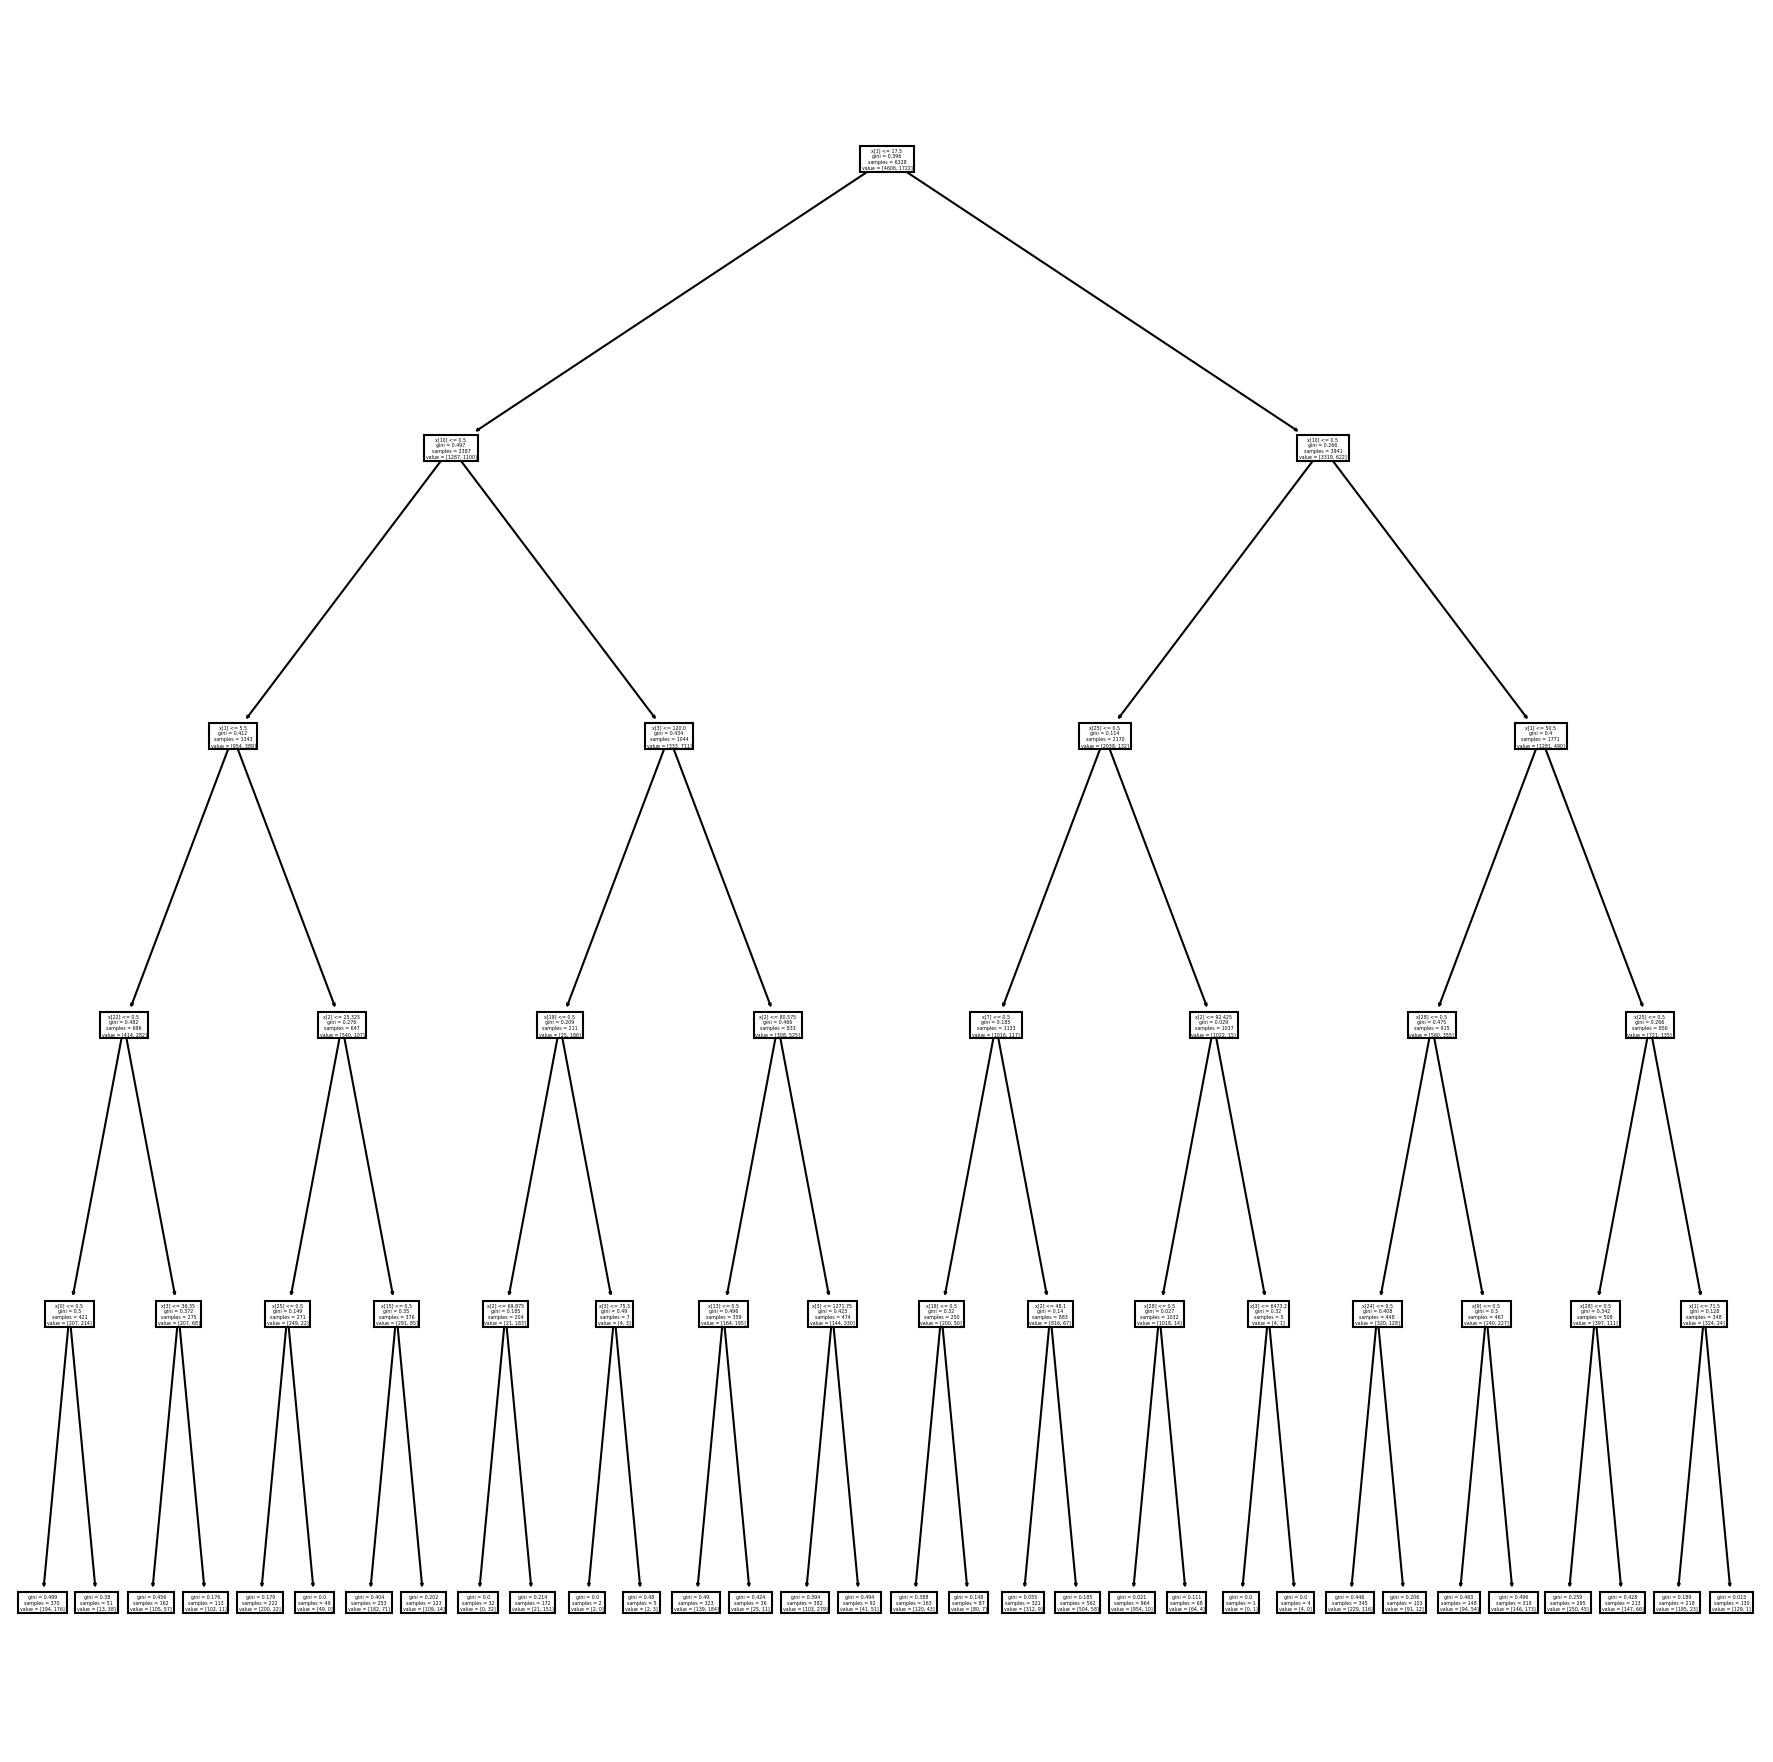

In [70]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15),dpi=150)
plot_tree(DT_good);

## Случайный лес (Random Forest)

**Задание: Создайте модель случайного леса, затем выведите отчёт "classification report" и матрицу ошибок для предсказанных результатов на тестовом наборе данных.**

In [72]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=5)
rfc.fit(X_train,y_train)
pred=rfc.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.85      0.93      0.89       557
         Yes       0.60      0.38      0.47       147

    accuracy                           0.82       704
   macro avg       0.73      0.66      0.68       704
weighted avg       0.80      0.82      0.80       704



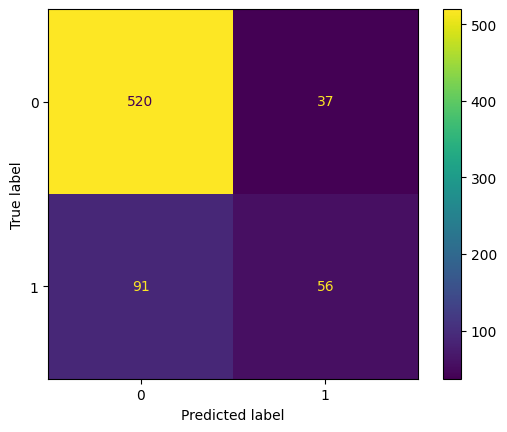

In [73]:
cm=confusion_matrix(y_test,pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm) 
disp.plot()
plt.show()

In [75]:
param_grid = {'n_estimators':[5,10,20,25,30,40,50],'max_depth':[3,4,5,6]}
Gridrf=GridSearchCV(rfc,param_grid)
Gridrf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(max_depth=5),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [5, 10, 20, 25, 30, 40, 50]})

In [76]:
Gridrf.best_params_

{'max_depth': 6, 'n_estimators': 40}

In [77]:
Good_rfc=RandomForestClassifier(n_estimators=40,max_depth=5)
Good_rfc.fit(X_train,y_train)
good_pred=Good_rfc.predict(X_test)
print(classification_report(y_test,good_pred))

              precision    recall  f1-score   support

          No       0.86      0.93      0.89       557
         Yes       0.62      0.41      0.49       147

    accuracy                           0.82       704
   macro avg       0.74      0.67      0.69       704
weighted avg       0.81      0.82      0.81       704



## Расширяемые деревья (Boosted Trees)

**Задание: Создайте модель AdaBoost или Gradient Boosting, затем выведите отчёт "classification report" и матрицу ошибок для предсказанных результатов на тестовом наборе данных.**

In [84]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier(n_estimators=110)
gbc.fit(X_train,y_train)
abc.fit(X_train,y_train)
gbc_pred=gbc.predict(X_test)
abc_pred=gbc.predict(X_test)
print('GradientBoostingClassifier:\n',classification_report(y_test,gbc_pred))
print('-'*20)
print('AdaBoostClassifier:\n',classification_report(y_test,abc_pred))

GradientBoostingClassifier:
               precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704

--------------------
AdaBoostClassifier:
               precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



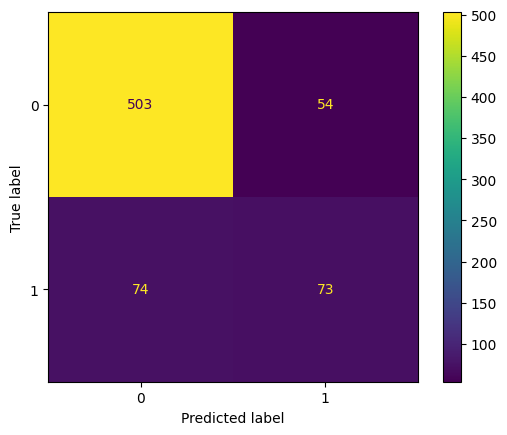

In [85]:
cm=confusion_matrix(y_test,abc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm) 
disp.plot()
plt.show()

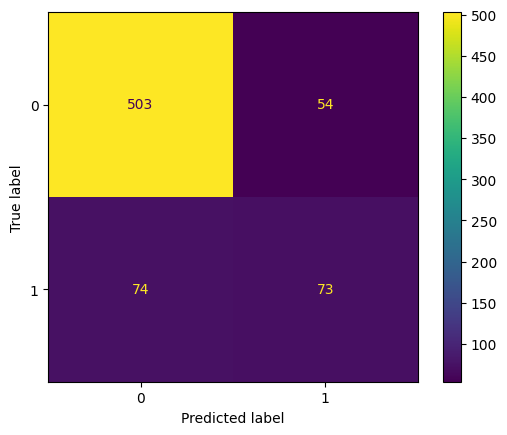

In [86]:
cm=confusion_matrix(y_test,gbc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm) 
disp.plot()
plt.show()

**Задания: Сравнивая результаты, какая модель у Вас работает лучше других?**

- Во-первых, у нас очень низкий recall,хотя в контексте данной задачи - это ключевая метрика :(
- Во-вторых, Бустинги показали себя одинаково, хотя обычно какой-то из них справляется лучше (пусть даже на 0.01)